<a href="https://colab.research.google.com/github/big91987/kaikeba_kaggle/blob/master/lesson_2_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# x_path = '/content/drive/My Drive/forecasting/zjz/data/x_extend_result.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# import library
import pandas as pd
pd.set_option('display.max_column',100)
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
# plt.figure(figsize=(14, 10))
import numpy as np
import seaborn as sns

%matplotlib inline
# 可以省略 plt.show()

import warnings
warnings.filterwarnings('ignore')

# Homework 1 练习课堂代码

In [0]:
# simple ead ways
data = pd.read_csv('/content/drive/My Drive/kaggle_play/kaikeba/lesson_2/creditcard.csv')
print(' ======> {}'.format(data.head()))
print(' ======> {}'.format(data.shape))
print(' ======> {}'.format(data.info()))
print(' ======> {}'.format(data.columns))
print(' ======> {}'.format(data.describe()))
print(' ======> {}'.format(data['Class'].value_counts()))
# print(' ======> {}'.format(data.isnull().sum()))
# print(' ======> {}'.format(data.isnull().sum().max())) # 包含缺失最多的一列有多少
# print(' ======> {}'.format(data.isnull().any()))
# print(' ======> {}'.format(data.isnull().values.any())) # 数据中是否有缺失值

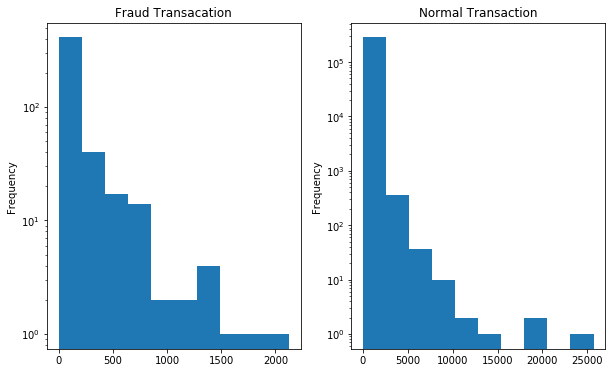

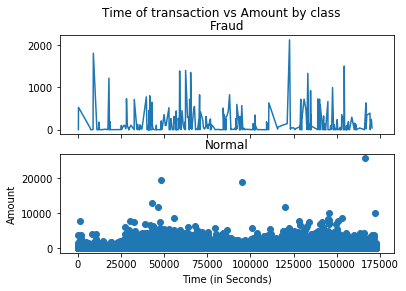

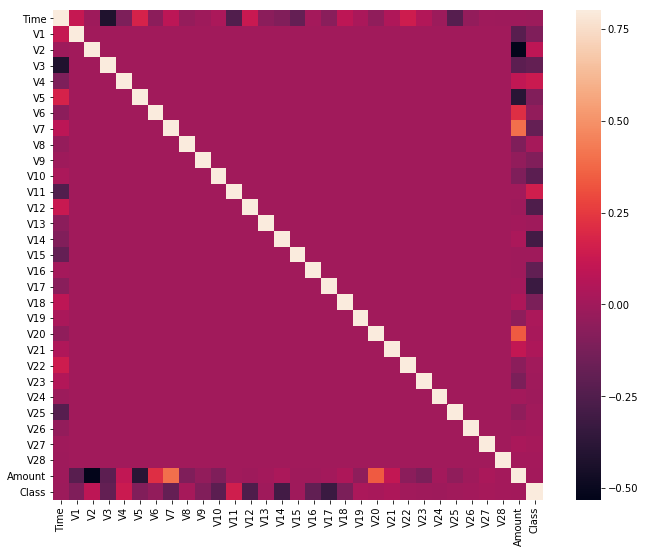

In [0]:
# Amount-histogram
Fraud_transacation = data[data["Class"]==1]
Normal_transacation= data[data["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)

# hist ====> 直方图，统计每个值出现次数

Fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.yscale('log')
plt.subplot(122)
Normal_transacation.Amount.plot.hist(title="Normal Transaction")
plt.yscale('log')

# Amount-Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
# 在每个时间上的交易量
ax1.plot(Fraud_transacation.Time, Fraud_transacation.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal_transacation.Time, Normal_transacation.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# correlation
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

## After sampling ?

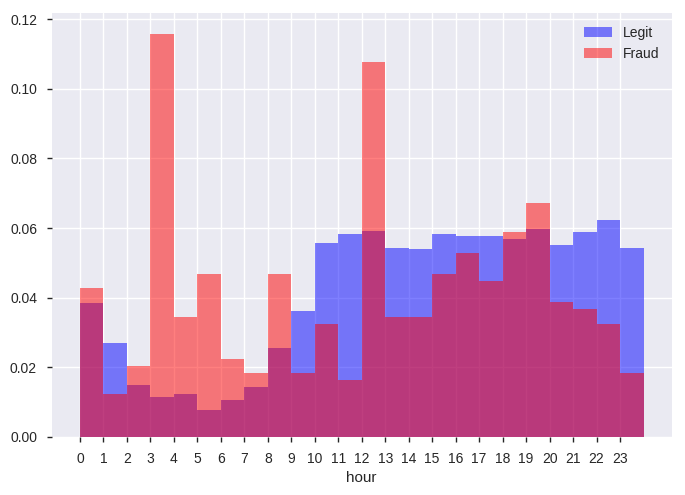

In [33]:
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
data.pivot_table(values='Amount',index='hour',columns='Class',aggfunc='count')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html

bins = np.arange(data['hour'].min(),data['hour'].max()+2)
# plt.figure(figsize=(15,4))
sns.distplot(data[data['Class']==0.0]['hour'],
             norm_hist=True,
             bins=bins,
             kde=False,
             color='b',
             hist_kws={'alpha':.5},
             label='Legit')
sns.distplot(data[data['Class']==1.0]['hour'],
             norm_hist=True,
             bins=bins,
             kde=False,
             color='r',
             label='Fraud',
             hist_kws={'alpha':.5})
plt.xticks(range(0,24))
plt.legend()

In [0]:
# https://github.com/pandas-profiling/pandas-profiling
# !pip install pandas_profiling
import pandas_profiling

pandas_profiling.ProfileReport(data)

# profile = pandas_profiling.ProfileReport(data)
# profile.to_file(output_file="/content/drive/My Drive/kaggle_play/kaikeba/lesson_2/credit_fraud_detector.html")

## 不平衡数据

Text(0, 0.5, 'Frequency')

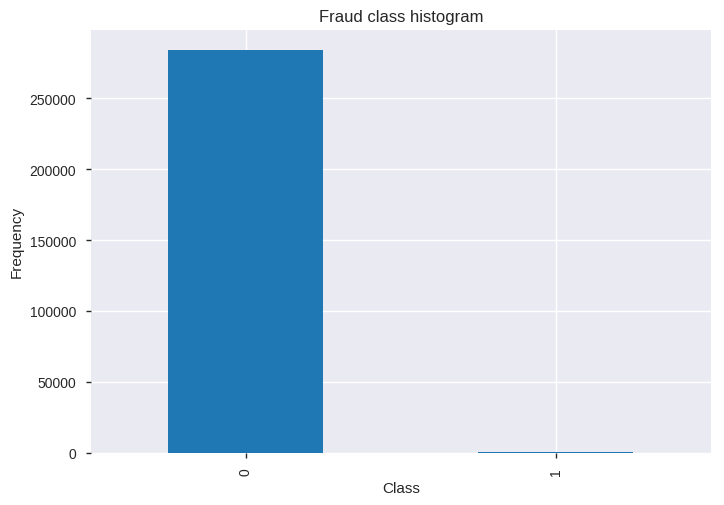

In [0]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

# data['Class'].hist()

## 划分测试集

In [4]:
total_num = data.shape[0]
split_rate = 0.7
train_num = int(split_rate * total_num)

train_df = data.iloc[:train_num,:]
test_df = data.loc[train_num:,:]

print(train_df.columns)

print(train_df.shape)
print(test_df.shape)



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(199364, 31)
(85443, 31)


## 预测

In [0]:
from sklearn.linear_model import LogisticRegression

X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

model = LogisticRegression(class_weight='balanced')

model.fit(X=train_df[X_col], y=train_df['Class'])

y_pred = model.predict(X=test_df[X_col])

y_true = test_df['Class']


# Homework 2 补充完整metric

## Confusion Matrix (混淆矩阵)

In [7]:
## homework ##
# 前面的是实际结果，后面的是预测结果 
def find_TP(y_true, y_pred):
    # 实际为正，预测为正
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
    # 实际为正，预测为负
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))
def find_FP(y_true, y_pred):
    # 实际为负，预测为正
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))
def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))

import numpy as np
def find_conf_matrix_values(y_true,y_pred):
    # calculate TP, FN, FP, TN
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN
def my_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])
  
my_confusion_matrix(y_true, y_pred)

array([[83705,  1630],
       [   13,    95]])

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[83705,  1630],
       [   13,    95]])

## Accuracy （正确率）

In [11]:
def my_accuracy_score(y_true, y_pred):
    # calculates the fraction of samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return (TP + TN)/ (TP + FN + FP + TN)
my_accuracy_score(y_true, y_pred)

0.9807708062685064

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9807708062685064

## Precision （精度、查准率）

In [13]:
# homework
def my_precision_score(y_true, y_pred):
    # calculates the fraction of predicted positives samples that are actually positive
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return TP / (TP + FP)
  
my_precision_score(y_true, y_pred)

0.05507246376811594

In [14]:
# 挑出来的里面正样本的比例 查准率
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.05507246376811594

## Recall （召回、查全率）

In [15]:
def my_recall_score(y_true, y_pred):
    # calculates the fraction of positive samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return TP / (TP + FN)
  
my_recall_score(y_true, y_pred)

0.8796296296296297

In [17]:
# 正样本里面被挑出为正的概率 查全率
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.8796296296296297

## F1 

In [19]:
def my_f1_score(y_true, y_pred):
    # calculates the F1 score
    recall = my_recall_score(y_true,y_pred)
    precision = my_precision_score(y_true,y_pred)
    return 2 * recall * precision / (recall + precision)

my_f1_score(y_true, y_pred)

0.10365521003818876

In [20]:
# R 与 P的调和平均
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.10365521003818876

In [23]:
# 根据阈值 进行打分，不同阈值得到的分数不一样(上面的都是按照threshold=0.5算的)

# threshold = 0.999945 # best
threshold = 0.5
y_prob = model.predict_proba(X=test_df[X_col])[:,1]
y_pred = np.zeros_like(y_prob, dtype=int)
y_pred[ y_prob > threshold] = 1

print('acc: {}, err: {}, P: {}, R: {}, F1: {}\n'.
      format(
          my_accuracy_score(y_true, y_pred),
          1.0 - my_accuracy_score(y_true, y_pred), 
          my_precision_score(y_true, y_pred), 
          my_recall_score(y_true, y_pred),
          my_f1_score(y_true, y_pred)
      ))

acc: 0.9807708062685064, err: 0.019229193731493566, P: 0.05507246376811594, R: 0.8796296296296297, F1: 0.10365521003818876



## ROC 曲线与 AUC面积

No handles with labels found to put in legend.


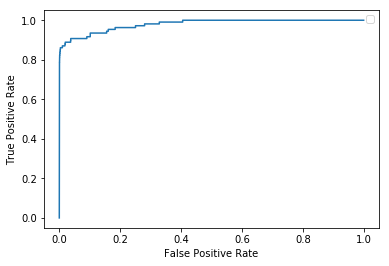

0.9796297923868674


In [24]:
# 为roc曲线传入y_true 和 y_prob y_prob是预测为正的概率
# 预测为正（类别1）的概率
y_prob = model.predict_proba(X=test_df[X_col])[:,1]
# prediction = model.decision_function(X=test_df[X_col])

y_true = test_df['Class']

# 绘制roc曲线
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_prob)
print(auc)

In [28]:
# 加速auc计算


from numba import jit

@jit
def fast_auc(y_true, y_prob):
    y_true = np.asarray(y_true)
    # argsort返回排序后的下标
    y_true = y_true[np.argsort(y_prob)]
    nfalse = 0
    auc = 0
    n = len(y_true)
    for i in range(n):
        y_i = y_true[i]
        nfalse += (1 - y_i)
        auc += y_i * nfalse
    auc /= (nfalse * (n - nfalse))
    return auc

# @jit
# def fast_fast_auc(y_true, y_prob):
#     return roc_auc_score(y_true, y_pred)
  
  ## test speed
y_true = np.random.randint(0,2,1000000)
y_pred = np.random.rand(1000000)

fast_auc(y_true, y_pred)

from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

%timeit print('auc1 is {}'.format(fast_auc(y_true, y_pred)))
%timeit print('auc2 is {}'.format(roc_auc_score(y_true, y_pred)))


auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
auc1 is 0.5003540584749403
a

# Homework 3

3. 按3：7划分数据集，用同一个模型，使用不同的权重，看不同评价指标的表现
比如： class_weight 在 [0.05, 0.95] 里取10个均匀部分的点，查看测试集在验证
集上的分数。分数可用 f1 , auc 等等，任选其一或多种，并画出随着
class_weight 的改变， score 是如何改变的


## 划分数据集

In [0]:
total_num = data.shape[0]
split_rate = 0.7
train_num = int(split_rate * total_num)

train_df = data.iloc[:train_num,:]
test_df = data.loc[train_num:,:]


X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X_train = train_df[X_col]
y_train = train_df['Class']
X_test = test_df[X_col]
y_test = test_df['Class']

## 遍历class_weight并预测

In [0]:
y_true = y_test

ret = []

for w in np.linspace(start=0.01, stop=1,num=30):
  
  model = LogisticRegression(class_weight={
      0: 1.0 - w,
      1: w
  })
  
  model.fit(X=X_train, y=y_train)
  
  y_prob = model.predict_proba(X=X_test)[:,1]
  
  ret.append((w, fast_auc(y_true=y_true, y_prob=y_prob)))
  
  


## plot结果

Text(0, 0.5, 'auc')

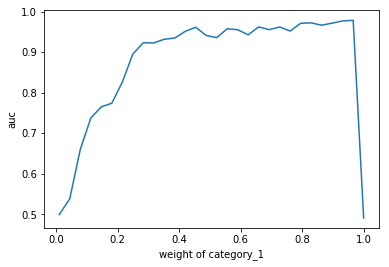

In [0]:
w_list, auc_list = list(zip(*ret))

plt.plot(w_list, auc_list)

plt.xlabel('weight of category_1')

plt.ylabel('auc')